# About the Dataset

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

This is a widely cited KNN dataset. It was encountered during a course, and it is shared here because it is a good starter example for data pre-processing and machine learning practices.

The possibility of predicting income level based on the individual’s personal information can be explored.

## Fields

The dataset contains 16 columns. The target field is `Income`, which is divided into two classes: `<=50K` and `>50K`. There are 14 attributes, which are the demographics and other features to describe a person.

## Acknowledgements

This dataset, named “adult”, is found in the UCI machine learning repository.

The detailed description of the dataset can be found in the original UCI documentation.

## Attribute Information

The attributes in the dataset are as follows:

- `age`: continuous
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
- `fnlwgt`: continuous
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
- `education-num`: continuous
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
- `sex`: Female, Male
- `capital-gain`: continuous
- `capital-loss`: continuous
- `hours-per-week`: continuous
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands
- `class`: >50K, <=50K


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/adult.csv")

In [3]:
sns.set_palette(sns.color_palette("pastel"))
plt.rcParams['figure.figsize'] = [14, 8]

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
# 0 - Makes $50 000 or less per year. 1 - Makes over $50 000 per year
df.income = df.income.replace({"<=50K": 0, ">50K": 1})

In [7]:
df.income.unique()

array([0, 1], dtype=int64)

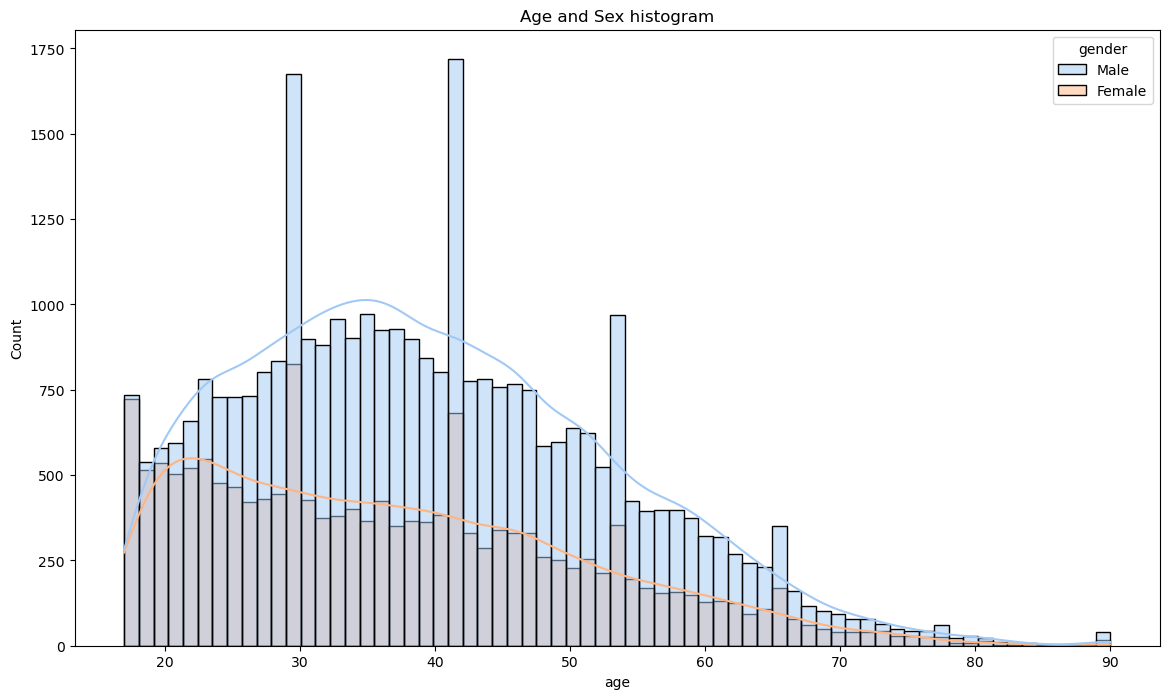

In [20]:
plt.title("Age and Sex histogram")
sns.histplot(x=df.age, kde=True, hue=df.gender);

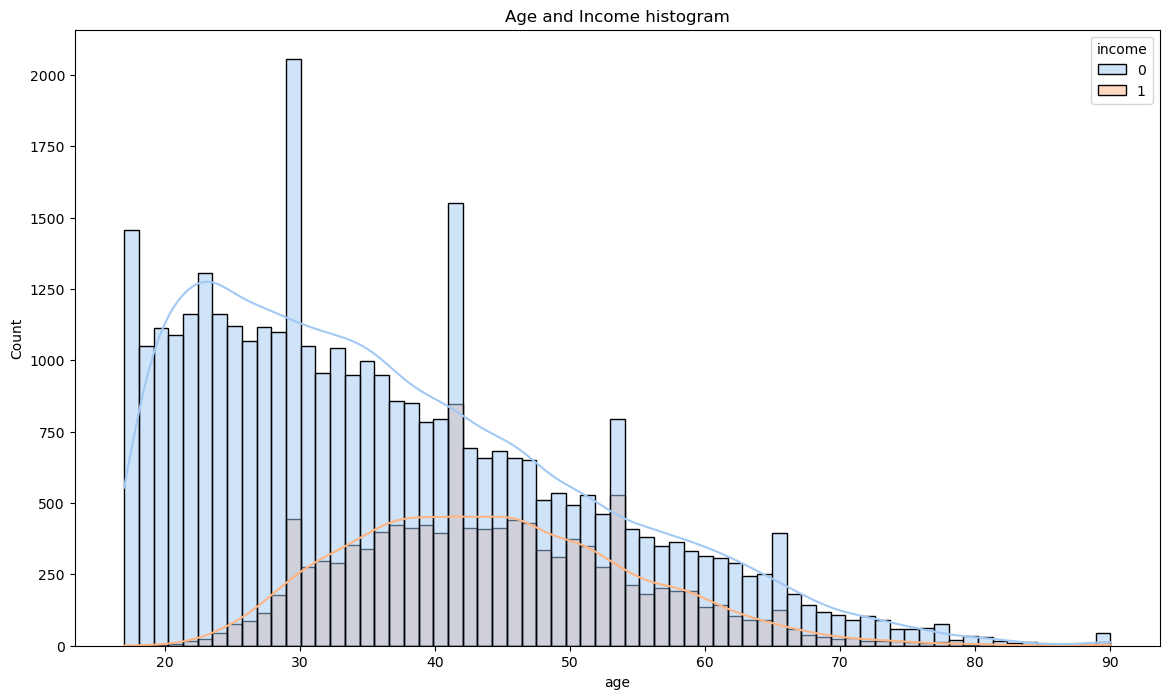

In [21]:
plt.title("Age and Income histogram")
sns.histplot(data=df, x="age", hue="income", kde=True);

In [10]:
# There are almost double the amount of men in this dataset
df.gender.value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [11]:
# How many males make $50 000 compared to females
crosstab_1 = pd.crosstab(df.gender, df.income[df.income==1])
crosstab_0 = pd.crosstab(df.gender, df.income[df.income==0])

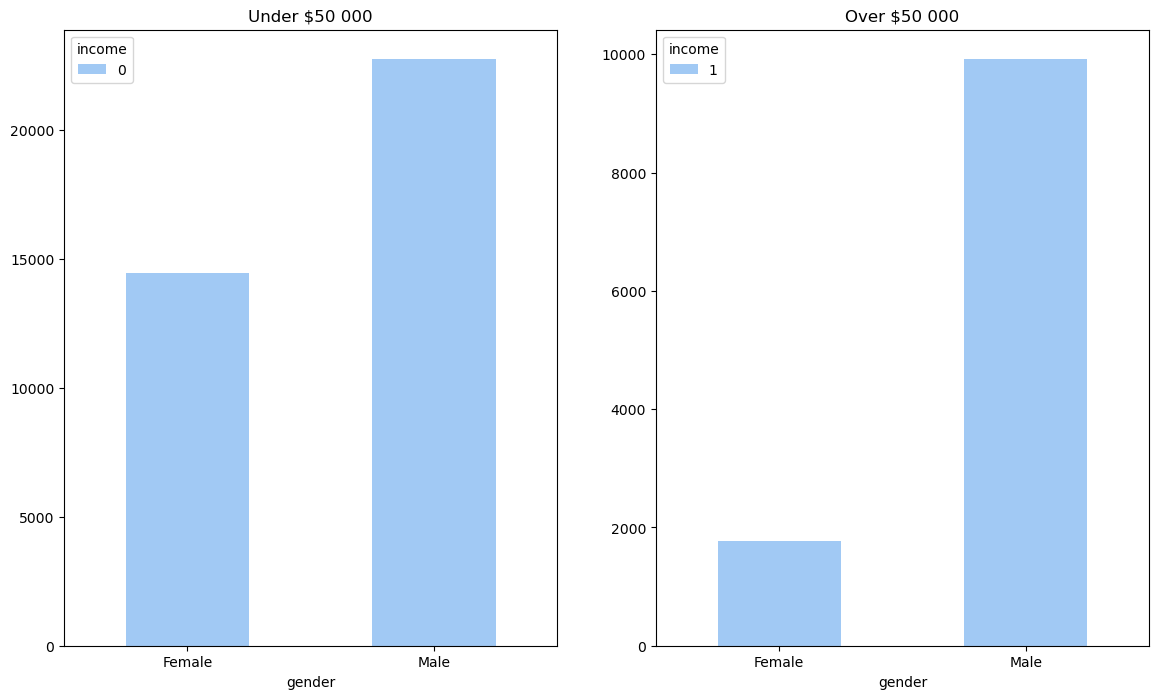

In [12]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax_1 = crosstab_0.plot(kind="bar", ax=ax1)
ax_1.set_title("Under $50 000")
ax_1.set_xticklabels(crosstab_0.index, rotation=0)

ax_2 = crosstab_1.plot(kind="bar", ax=ax2)
ax_2.set_title("Over $50 000")
ax_2.set_xticklabels(crosstab_1.index, rotation=0);

Out of the 16192 females. Less than half of them make above $50 000.

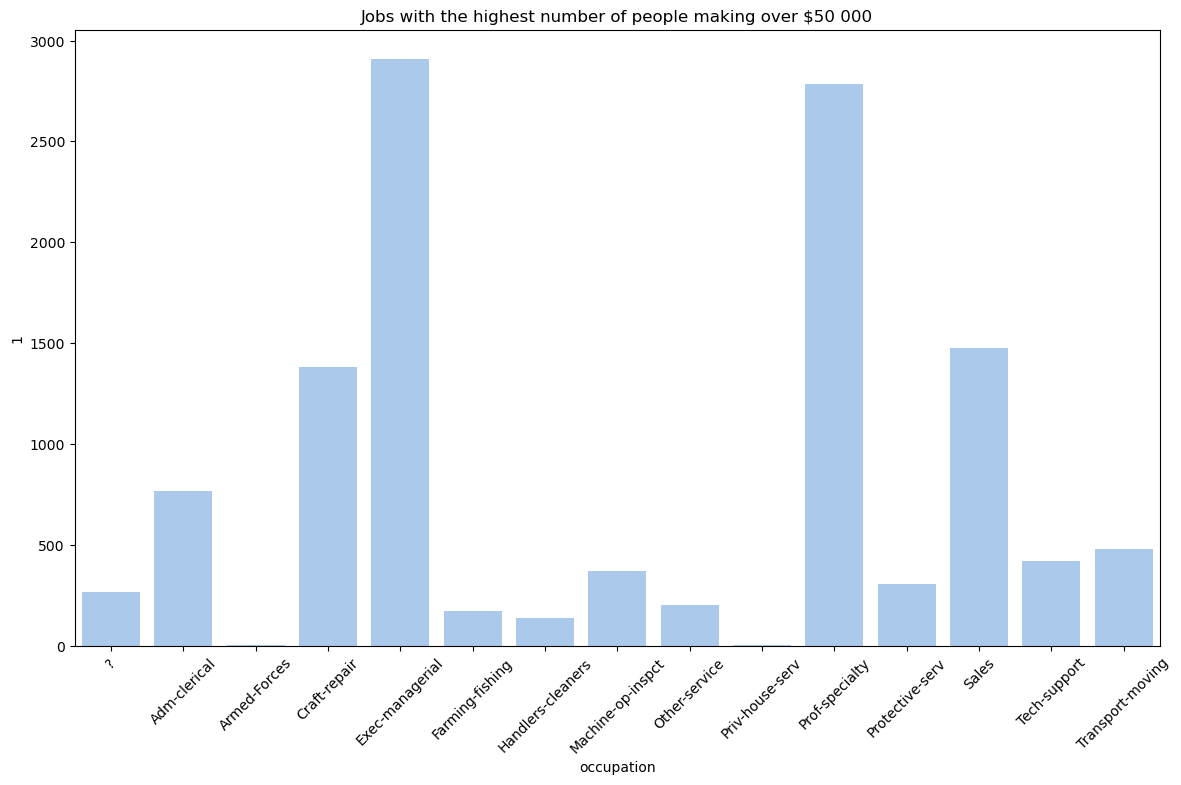

In [13]:
# Which jobs pay above the $50 000
crosstab_occ = pd.crosstab(df.occupation, df.income[df.income==1])
crosstab_occ.reset_index(inplace=True)

plt.title("Jobs with the highest number of people making over $50 000")
sns.barplot(data=crosstab_occ, x="occupation", y=1)
plt.xticks(rotation=45);

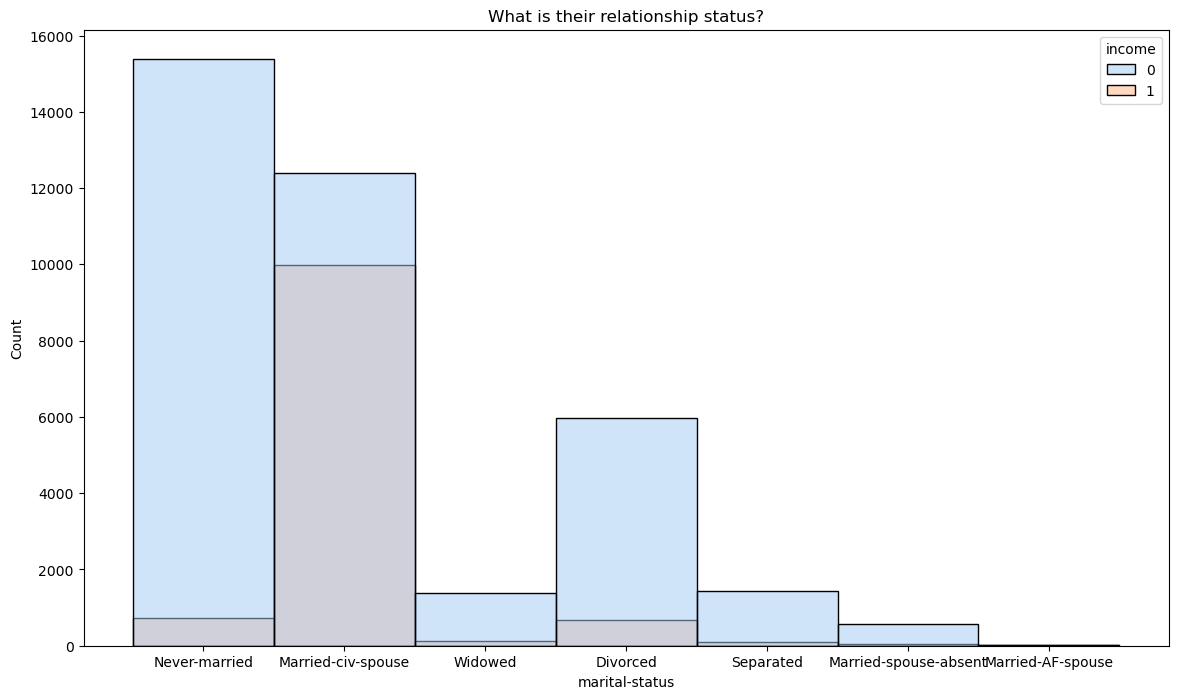

In [14]:
plt.title("What is their relationship status?")
sns.histplot(x=df["marital-status"], hue=df["income"]);

Most people making over $50 000 are married

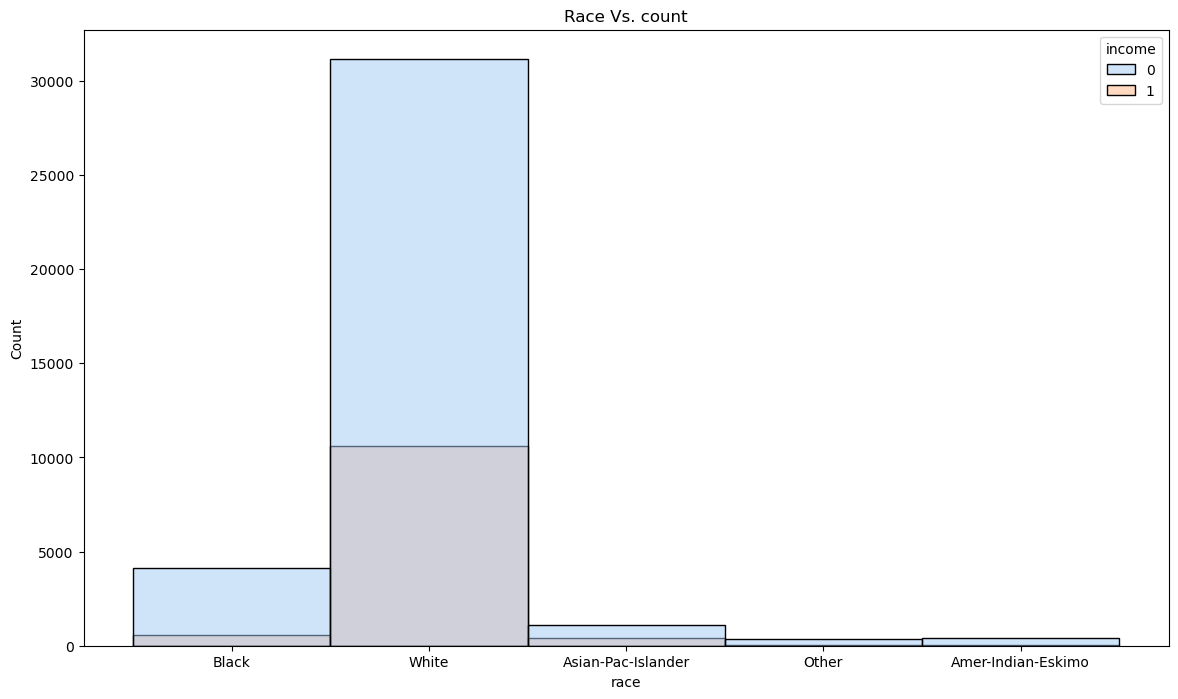

In [15]:
plt.title("Race Vs. count")
sns.histplot(data=df, x="race", hue="income");

value count the races

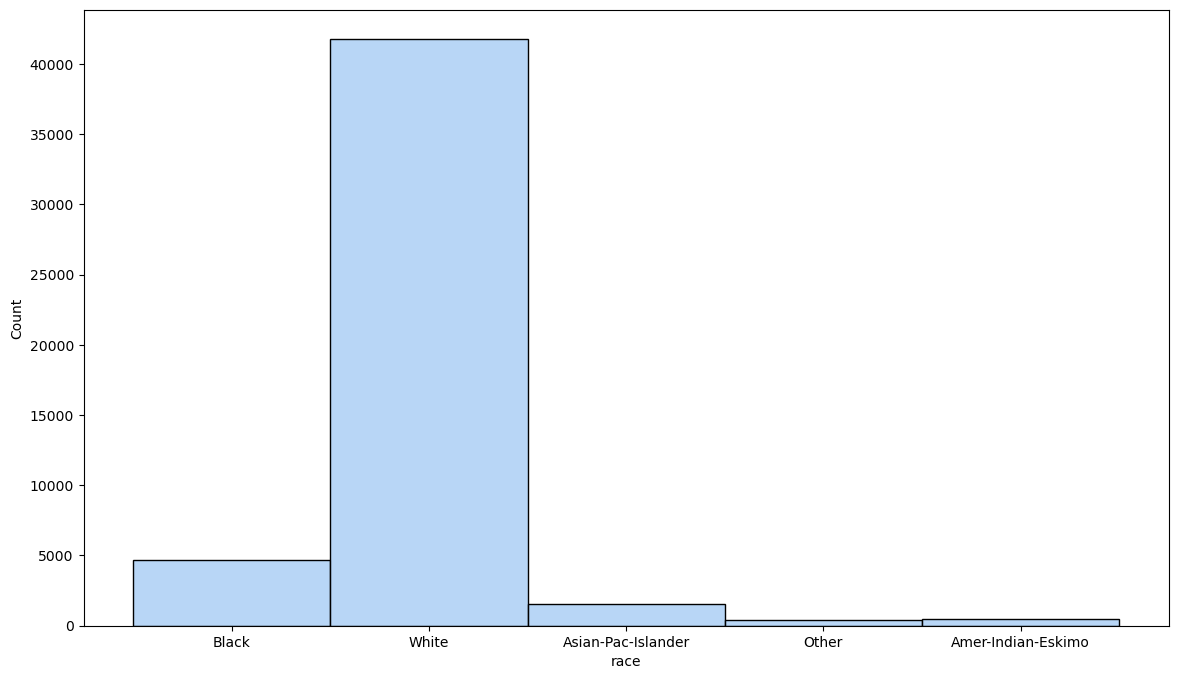

In [16]:
sns.histplot(data=df, x="race");

What about marriage?

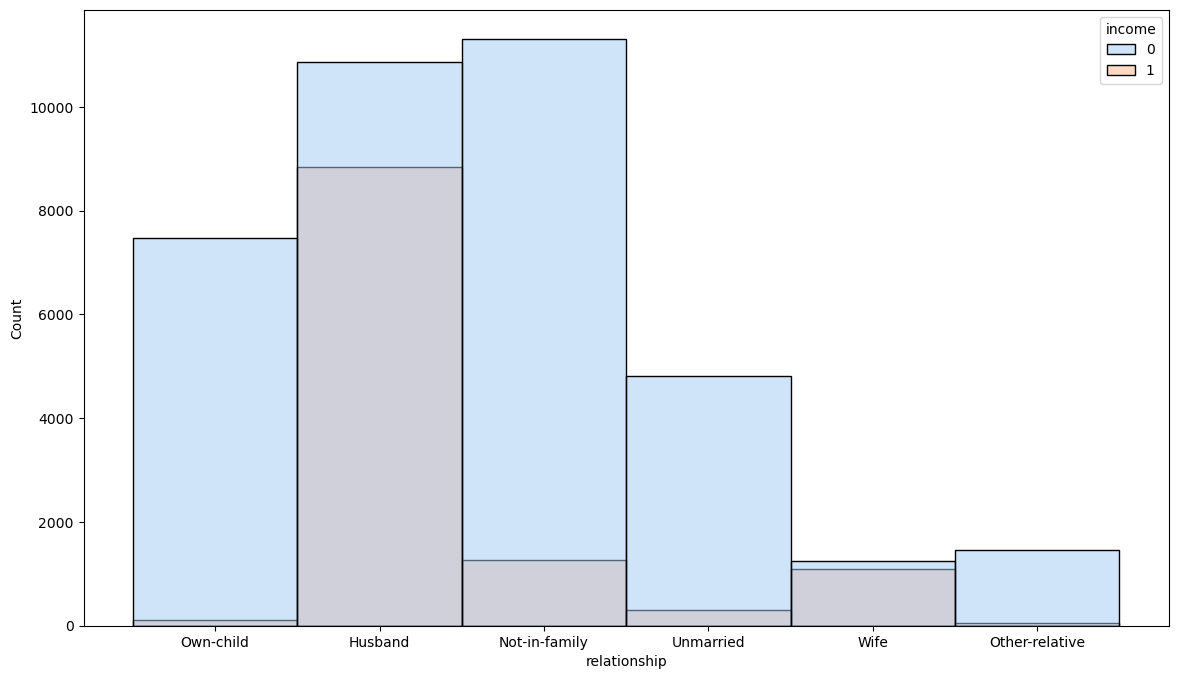

In [17]:
sns.histplot(data=df, x="relationship", hue="income");

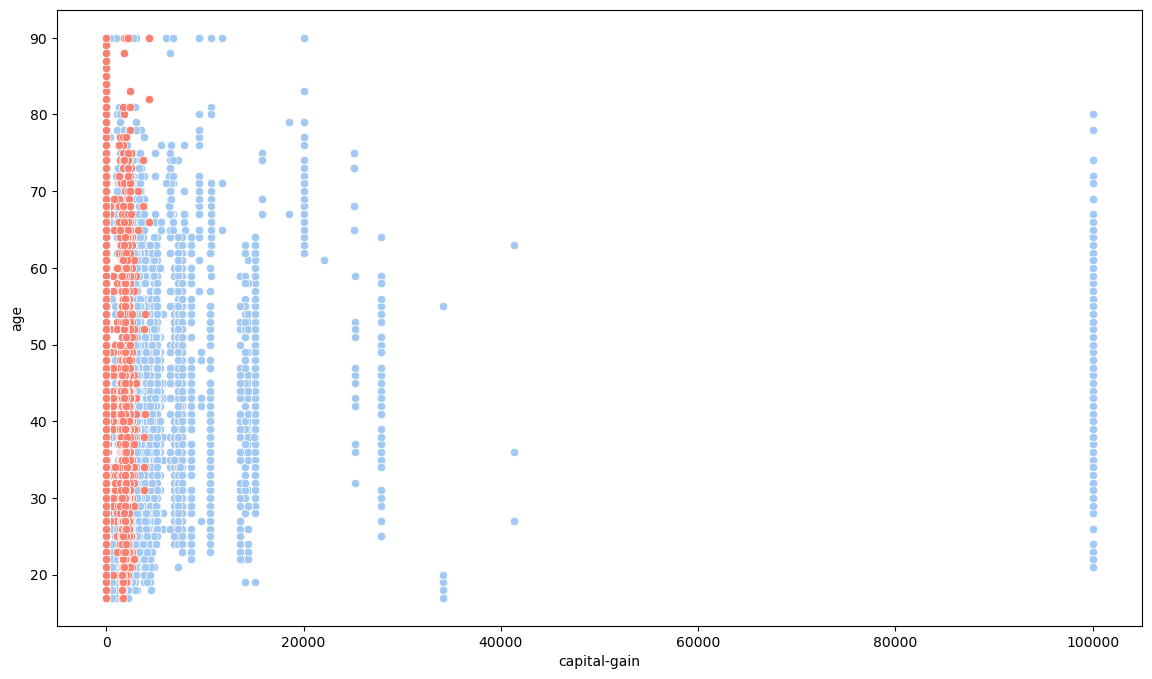

In [18]:
sns.scatterplot(data=df, x="capital-gain", y="age");
sns.scatterplot(data=df, x="capital-loss", y="age", color="salmon");

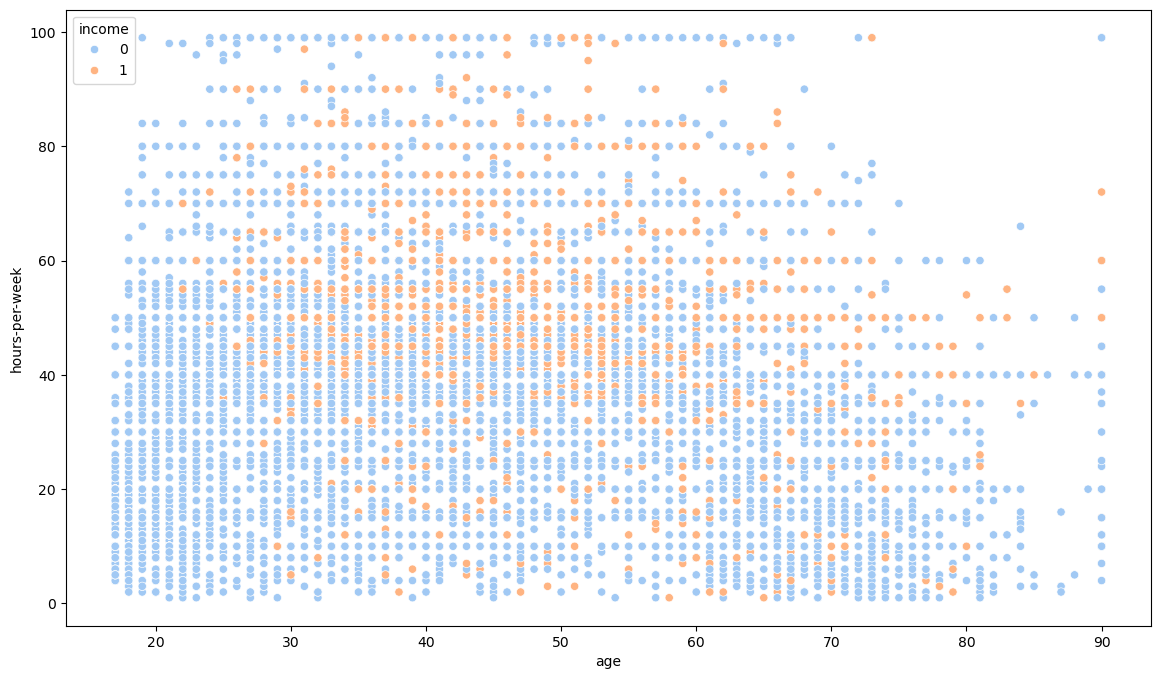

In [19]:
sns.scatterplot(data=df, x="age", y="hours-per-week", hue="income");